In [6]:
import pandas as pd

col_names = ["submission_id", "session","date","level","code","server_error","client_error","version", "lang", "email", "username", "is_test", "demo", "start"]
df = pd.read_csv("../../Data/2-logs-plain-2.csv", names=col_names)
df = df.iloc[1:]

df = df.loc[df['demo'] != True]
df = df.loc[df['start'] != True]
df = df.loc[df['server_error'] != "None"]
df = df.loc[df['server_error'] != "-"]
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S.%f")
df['level'] = pd.to_numeric(df.level, errors='coerce')
df = df.loc[df['level'] < 14]

temp_df = df.groupby(['session', 'level']).size().to_frame('size')

total = pd.merge(df, temp_df, left_on=['session','level'], right_on = ['session','level'])
total = total.loc[total['size'] > 1]
total = total.sort_values(by=['session', 'level', 'date'], ascending=[True, True, True])
#total = total.drop_duplicates(subset=['session', 'code'], keep='first')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
from tqdm.notebook import tqdm
import datetime

grouped = total.groupby(["session", "level"])
timeDifferences = []

for name, group in tqdm(grouped):
    timestamps = group['date'].tolist()
    for i in range(1, len(timestamps)):
        timeDifferences.append(timestamps[i] - timestamps[i-1])           
timeFrame = pd.DataFrame(timeDifferences, columns =['time'])

58948
{0: 21641, 1: 6398, 2: 2112, 3: 1579, 4: 1325, 5: 1286, 6: 1186, 7: 1133, 8: 1081, 9: 1079, 10: 987, 11: 994, 12: 944, 13: 898, 14: 847, 15: 821, 16: 757, 17: 708, 18: 653, 19: 630, 20: 672, 21: 589, 22: 571, 23: 519, 24: 527, 25: 515, 26: 453, 27: 449, 28: 444, 29: 393, 30: 357, 31: 344, 32: 335, 33: 370, 34: 323, 35: 299, 36: 302, 37: 342, 38: 253, 39: 259, 40: 268, 41: 248, 42: 217, 43: 214, 44: 227, 45: 187, 46: 211, 47: 185, 48: 159, 49: 182, 50: 162, 51: 170, 52: 168, 53: 153, 54: 136, 55: 141, 56: 144, 57: 164, 58: 118, 59: 119}


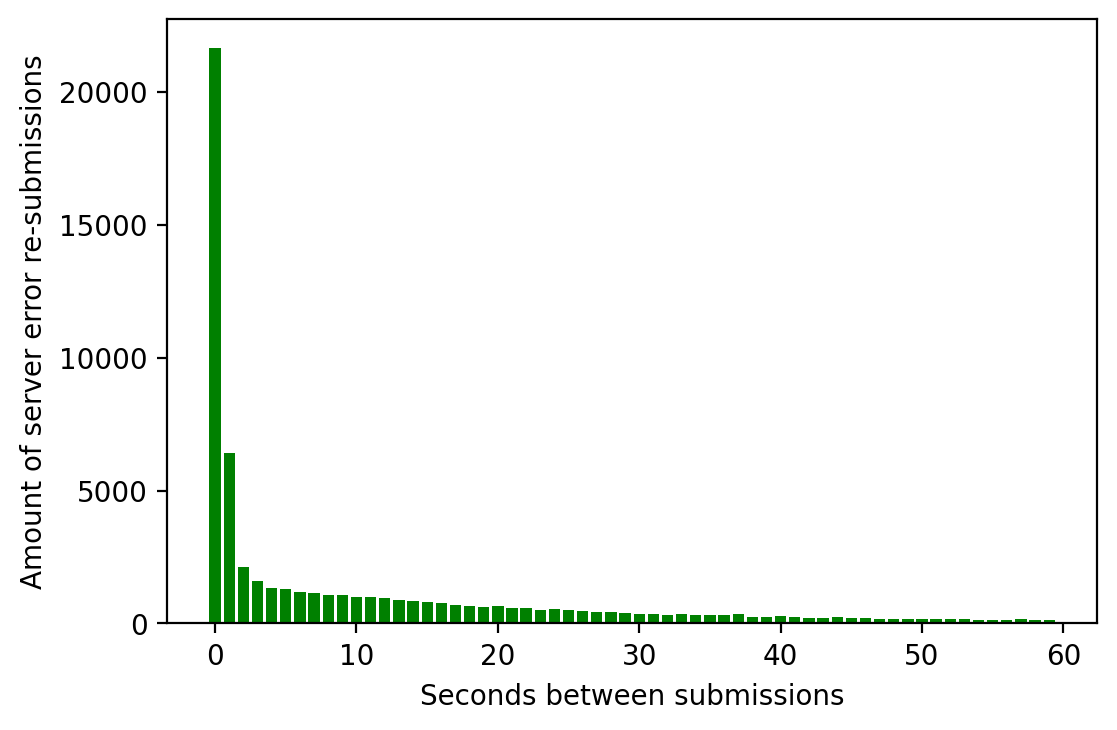

In [5]:
import datetime
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

data = []
for i in range(1, 62):
    data.append(timeFrame.loc[timeFrame['time'] < datetime.timedelta(seconds=i)].shape[0])

dict_data = {}    
total = 0


for i in range(0, len(data)-1):
    if i == 0: #in this case we just take the number
        dict_data[i] = data[i]
        total += data[i]
    else:
        dict_data[i] = data[i] - data[i-1]
        total += dict_data[i]

print(total)
print(dict_data)
        
plt.bar(*zip(*dict_data.items()), color='green')
plt.xlabel("Seconds between submissions")
plt.ylabel("Amount of server error re-submissions")
plt.show() 